In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.optimizers import SGD
import seaborn as sns

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

print(X_train.shape,"X_train shape")
print(X_test.shape,"y_test shape")

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) X_train shape
(10000, 32, 32, 3) y_test shape


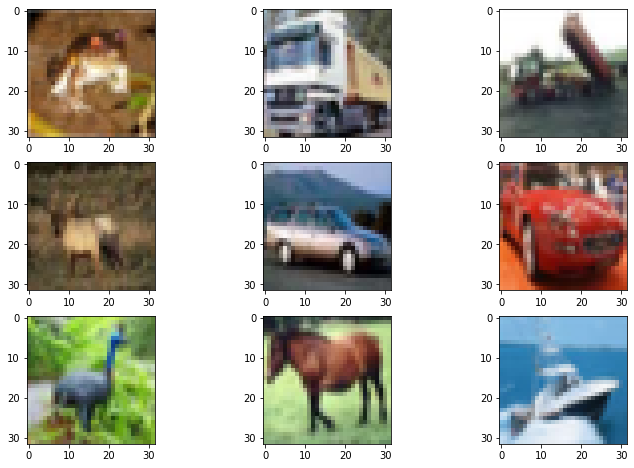

In [ ]:
plt.figure(figsize=(12,8))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
plt.show()

In [ ]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

X_train/=255
X_test/=255

In [ ]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]

num_classes

10

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.regularizers import l2
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding="same",activation="relu",kernel_constraint=maxnorm(3),kernel_regularizer=l2(2e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation="relu",padding="same",kernel_constraint=maxnorm(3),kernel_regularizer=l2(2e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),activation="relu",padding="same",kernel_constraint=maxnorm(3),kernel_regularizer=l2(2e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",padding="same",kernel_constraint=maxnorm(3),kernel_regularizer=l2(2e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation="relu",padding="same",kernel_constraint=maxnorm(3),kernel_regularizer=l2(2e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu",padding="same",kernel_constraint=maxnorm(3),kernel_regularizer=l2(2e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu",kernel_constraint=maxnorm(3),kernel_regularizer=l2(2e-4)))
model.add(Dropout(0.2))



model.add(Dense(num_classes,activation="softmax"))



In [ ]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0

In [ ]:
model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  epochs=10,
                  batch_size=128)

Epoch 1/10
391/391 [==============================] - 494s 1s/step - loss: 1.8297 - accuracy: 0.4355 - val_loss: 2.0399 - val_accuracy: 0.4042
Epoch 2/10
391/391 [==============================] - 487s 1s/step - loss: 1.4422 - accuracy: 0.5683 - val_loss: 1.5127 - val_accuracy: 0.5487
Epoch 3/10
391/391 [==============================] - 486s 1s/step - loss: 1.2585 - accuracy: 0.6362 - val_loss: 1.2222 - val_accuracy: 0.6561
Epoch 4/10
391/391 [==============================] - 486s 1s/step - loss: 1.1333 - accuracy: 0.6812 - val_loss: 1.2122 - val_accuracy: 0.6672
Epoch 5/10
391/391 [==============================] - 483s 1s/step - loss: 1.0463 - accuracy: 0.7127 - val_loss: 1.1518 - val_accuracy: 0.6911
Epoch 6/10
391/391 [==============================] - 486s 1s/step - loss: 0.9761 - accuracy: 0.7370 - val_loss: 1.0324 - val_accuracy: 0.7248
Epoch 7/10
391/391 [==============================] - 486s 1s/step - loss: 0.9138 - accuracy: 0.7592 - val_loss: 0.9964 - val_accuracy: 0.7363

In [ ]:
acc=model.evaluate(X_test,y_test)

313/313 [==============================] - 24s 77ms/step - loss: 0.9271 - accuracy: 0.7562


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(X_test,batch_size=128)
y_pred=np.argmax(y_pred,axis=1)


79/79 [==============================] - 21s 257ms/step


In [ ]:
y_test=np.argmax(y_test,axis=1)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1000
           1       0.88      0.91      0.89      1000
           2       0.57      0.75      0.65      1000
           3       0.56      0.64      0.60      1000
           4       0.80      0.57      0.66      1000
           5       0.73      0.60      0.66      1000
           6       0.89      0.76      0.82      1000
           7       0.75      0.85      0.80      1000
           8       0.89      0.85      0.87      1000
           9       0.90      0.83      0.86      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000

AxesSubplot(0.125,0.125;0.62x0.755)


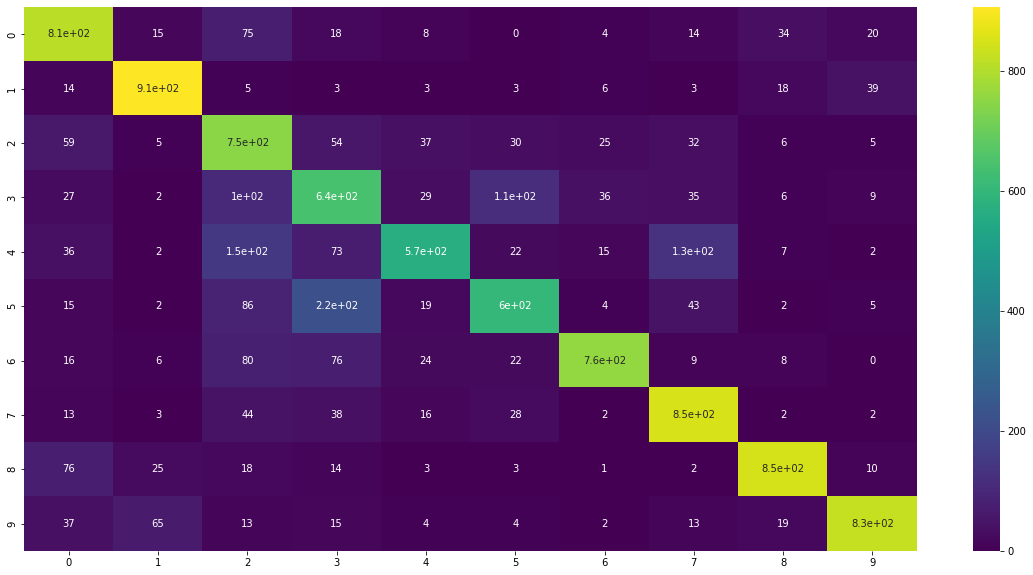

In [ ]:
print(classification_report(y_test,y_pred))
plt.figure(figsize=(20,10))
cnfm=confusion_matrix(y_test,y_pred)
print(sns.heatmap(cnfm,annot=True,cmap="viridis"))

In [ ]:
results={
    0:"aeroplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

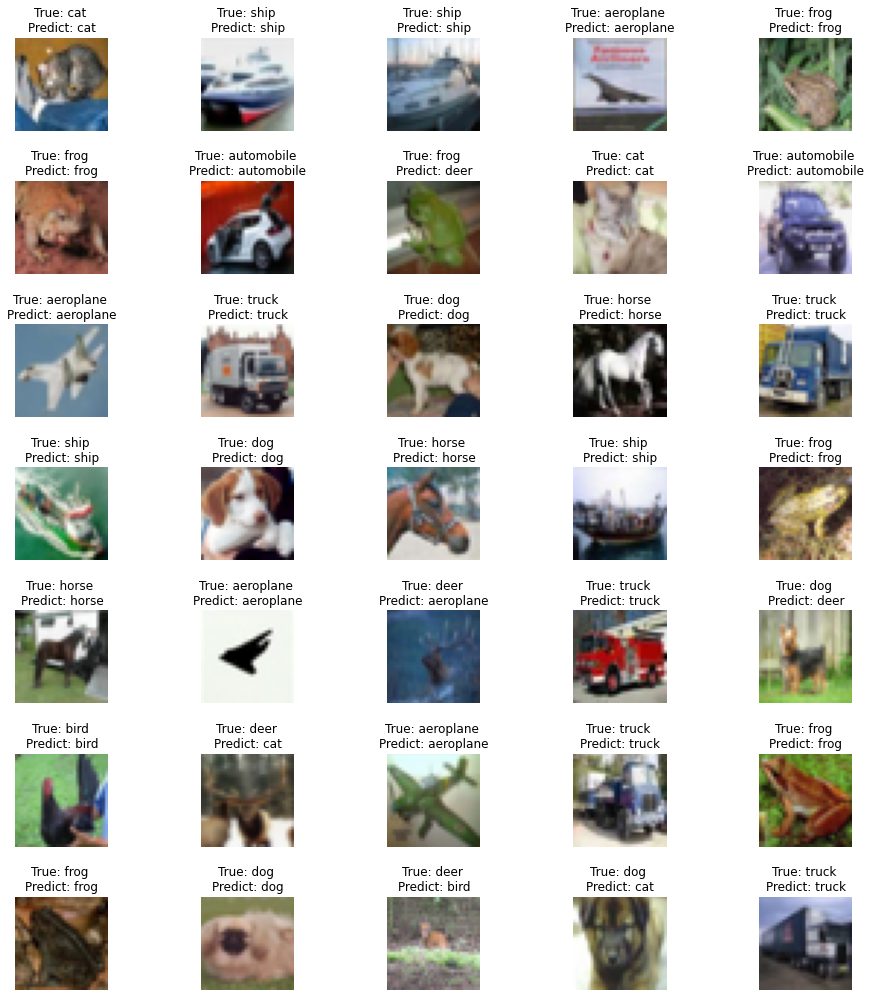

In [ ]:
fig,axes=plt.subplots(7,5,figsize=(15,18))
axes=axes.ravel()

for i in np.arange(35):
  axes[i].imshow(X_test[i])
  axes[i].set_title("True: %s \nPredict: %s"%(results[y_test[i]],results[y_pred[i]]))
  axes[i].axis("off")
  plt.subplots_adjust(wspace=1)

In [61]:
model.save("model_cifar10.h5")